# XG Boost

In [1]:
# Importing Libraries
import pandas as pd 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings('ignore')

### Load Dataset


In [6]:
# Reading the dataset from the csv file # separator is a vertical line, as seen in the dataset 
df = pd.read_csv("../DataSet/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


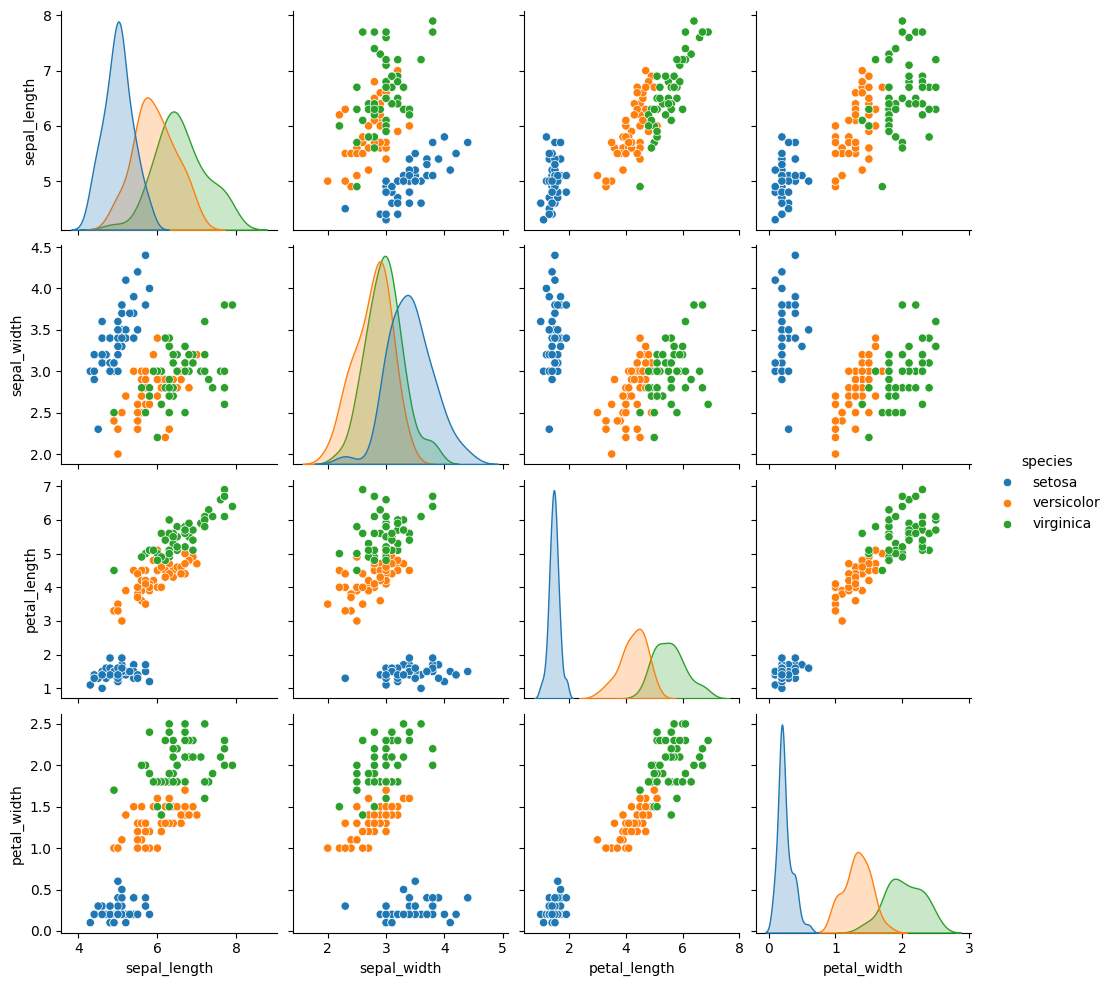

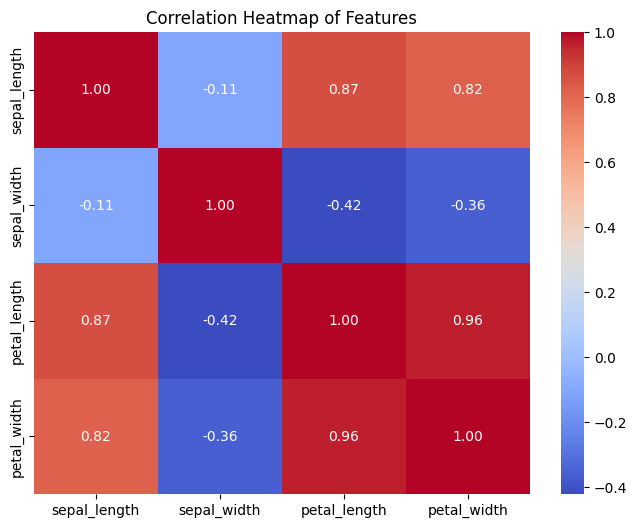

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'species' column to categorical type
df['species'] = df['species'].astype('category')

# Retry the pairplot with the corrected data
sns.pairplot(df, hue='species')
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
corr_matrix = df.iloc[:, :-1].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.show()

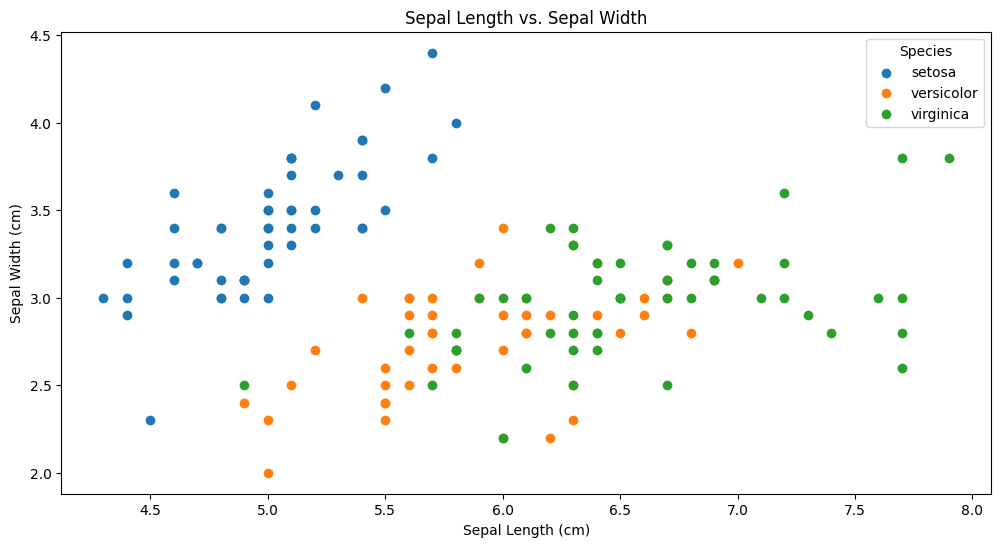

In [10]:
# Scatter plot of the features colored by class
plt.figure(figsize=(12, 6))
for species, species_data in df.groupby('species'):
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'], label=species)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.title('Sepal Length vs. Sepal Width')
plt.show()

### Data Encoding



In [11]:

label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

### Data Splitting

In [13]:
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize the AdaBoost classifier
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
ada_model.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada_model.predict(X_test)

# Evaluate the model
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {ada_accuracy * 100:.2f}%")

AdaBoost Accuracy: 100.00%


In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")